In [452]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error



In [2]:
df = pd.read_csv('working_df.csv')

In [3]:
df

,Unnamed: 0,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
0,2000-02-01,5.200000e-03,17.32,26.99,1.270000e-01,9.000000e-04,2985.0,56.0,0.044,15439.0,77.0,19.40,1.270000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.900000e-02,1.000000e-02,6.992500e-06
1,2000-03-01,5.900000e-03,14.47,26.12,1.240000e-01,9.000000e-04,3049.0,51.0,0.043,15265.0,177.0,17.92,1.240000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.600000e-02,1.000000e-02,6.992500e-06
2,2000-05-01,5.500000e-03,16.10,26.65,1.300000e-01,9.000000e-04,3103.0,52.0,0.045,16956.0,185.0,18.00,1.290000e-01,3.1,6.880000e+00,1.000000e-04,1.000000e-01,5.900000e-02,2.000000e-02,6.992500e-06
3,2000-06-01,6.900000e-03,19.68,22.89,1.270000e-01,9.000000e-04,3135.0,54.0,0.042,16398.0,115.0,16.85,1.270000e-01,3.1,7.220000e+00,1.000000e-04,1.000000e-01,5.600000e-02,2.000000e-02,6.992500e-06
4,2000-08-01,6.700000e-03,15.73,25.54,1.330000e-01,9.000000e-04,3178.0,63.0,0.045,18071.0,104.0,15.74,1.330000e-01,3.1,7.340000e+00,1.000000e-04,1.000000e-01,6.000000e-02,2.000000e-02,6.992500e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,2021-11-11,6.078510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06
4161,2021-11-12,6.014640e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06
4162,2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06
4163,2021-11-16,5.962450e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.690000e+06


In [4]:
df.set_index(df['Unnamed: 0'], inplace=True)

In [5]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

In [7]:
df

,Unnamed: 0,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
2000-02-01,2000-02-01,5.200000e-03,17.32,26.99,1.270000e-01,9.000000e-04,2985.0,56.0,0.044,15439.0,77.0,19.40,1.270000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.900000e-02,1.000000e-02,6.992500e-06
2000-03-01,2000-03-01,5.900000e-03,14.47,26.12,1.240000e-01,9.000000e-04,3049.0,51.0,0.043,15265.0,177.0,17.92,1.240000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.600000e-02,1.000000e-02,6.992500e-06
2000-05-01,2000-05-01,5.500000e-03,16.10,26.65,1.300000e-01,9.000000e-04,3103.0,52.0,0.045,16956.0,185.0,18.00,1.290000e-01,3.1,6.880000e+00,1.000000e-04,1.000000e-01,5.900000e-02,2.000000e-02,6.992500e-06
2000-06-01,2000-06-01,6.900000e-03,19.68,22.89,1.270000e-01,9.000000e-04,3135.0,54.0,0.042,16398.0,115.0,16.85,1.270000e-01,3.1,7.220000e+00,1.000000e-04,1.000000e-01,5.600000e-02,2.000000e-02,6.992500e-06
2000-08-01,2000-08-01,6.700000e-03,15.73,25.54,1.330000e-01,9.000000e-04,3178.0,63.0,0.045,18071.0,104.0,15.74,1.330000e-01,3.1,7.340000e+00,1.000000e-04,1.000000e-01,6.000000e-02,2.000000e-02,6.992500e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,2021-11-11,6.078510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06
2021-11-12,2021-11-12,6.014640e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06
2021-11-15,2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,1575.30,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06


In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df

<AxesSubplot:ylabel='Unnamed: 0'>

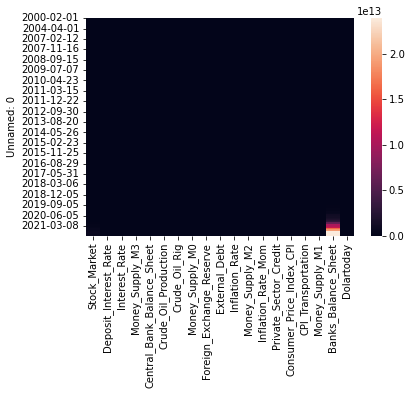

In [9]:
sns.heatmap(df)

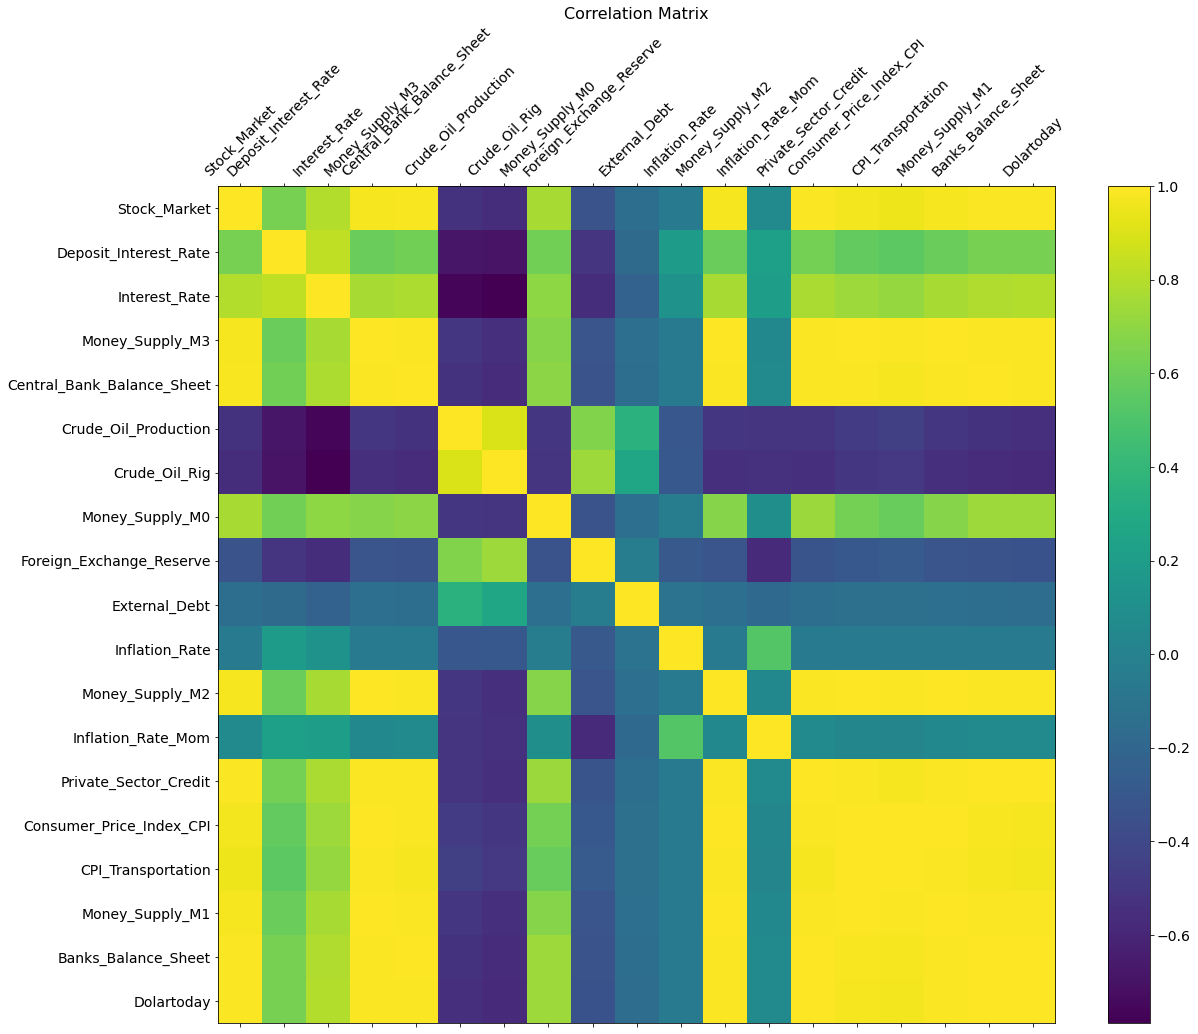

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [11]:

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
Stock_Market,1.000000,0.636609,0.791021,0.979004,0.982153,-0.527240,-0.557404,0.765520,-0.331622,-0.143755,-0.045277,0.979004,0.060661,0.989306,0.970712,0.956683,0.979002,0.992270,0.991334
Deposit_Interest_Rate,0.636609,1.000000,0.827457,0.592444,0.617321,-0.680906,-0.696815,0.617009,-0.510882,-0.173177,0.198803,0.592444,0.221277,0.623097,0.573122,0.548290,0.592427,0.629841,0.635426
Interest_Rate,0.791021,0.827457,1.000000,0.762479,0.780056,-0.758122,-0.788698,0.695493,-0.551607,-0.229664,0.130035,0.762479,0.209569,0.773258,0.736684,0.715178,0.762471,0.784171,0.792669
Money_Supply_M3,0.979004,0.592444,0.762479,1.000000,0.991796,-0.505007,-0.538078,0.671645,-0.313746,-0.138733,-0.044299,1.000000,0.046856,0.990354,0.996777,0.991885,1.000000,0.990104,0.987199
Central_Bank_Balance_Sheet,0.982153,0.617321,0.780056,0.991796,1.000000,-0.528195,-0.560203,0.687357,-0.327611,-0.144210,-0.046922,0.991796,0.061337,0.992678,0.987106,0.978768,0.991795,0.993481,0.991487
Crude_Oil_Production,-0.527240,-0.680906,-0.758122,-0.505007,-0.528195,1.000000,0.901168,-0.508394,0.663544,0.351807,-0.302551,-0.505007,-0.515984,-0.513930,-0.472765,-0.452520,-0.504988,-0.527438,-0.539551
Crude_Oil_Rig,-0.557404,-0.696815,-0.788698,-0.538078,-0.560203,0.901168,1.000000,-0.521265,0.738566,0.263258,-0.297836,-0.538078,-0.530302,-0.546969,-0.508216,-0.488701,-0.538061,-0.559222,-0.570595
Money_Supply_M0,0.765520,0.617009,0.695493,0.671645,0.687357,-0.508394,-0.521265,1.000000,-0.333033,-0.135242,-0.039746,0.671645,0.103444,0.728512,0.628502,0.585106,0.671646,0.737459,0.740670
Foreign_Exchange_Reserve,-0.331622,-0.510882,-0.551607,-0.313746,-0.327611,0.663544,0.738566,-0.333033,1.000000,-0.030513,-0.291830,-0.313746,-0.574210,-0.321505,-0.292649,-0.278427,-0.313734,-0.330092,-0.337179
External_Debt,-0.143755,-0.173177,-0.229664,-0.138733,-0.144210,0.351807,0.263258,-0.135242,-0.030513,1.000000,-0.107066,-0.138733,-0.174328,-0.140534,-0.130552,-0.125440,-0.138728,-0.143926,-0.146987


In [16]:
feature_list = ['Stock_Market',"Deposit_Interest_Rate","Interest_Rate","Money_Supply_M3","Central_Bank_Balance_Sheet","Crude_Oil_Production","Crude_Oil_Rig","Money_Supply_M0","Foreign_Exchange_Reserve","External_Debt","Inflation_Rate","Money_Supply_M2","Inflation_Rate_Mom","Private_Sector_Credit","Consumer_Price_Index_CPI","CPI_Transportation","Money_Supply_M1","Banks_Balance_Sheet","Dolartoday"]



In [17]:
feature_list

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Money_Supply_M0',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Money_Supply_M2',
 'Inflation_Rate_Mom',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet',
 'Dolartoday']

In [18]:
df['Dolartoday'].corr(df['Stock_Market'])

0.9913338420764568

In [21]:
important_features = []
less_important_features = []
for i in feature_list[:-1]:
    if df['Dolartoday'].corr(df[i])>.6:
        important_features.append(i)
    else:
        less_important_features.append(i)
        


In [22]:
important_features

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Money_Supply_M0',
 'Money_Supply_M2',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet']

In [23]:
less_important_features

['Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Inflation_Rate_Mom']

In [29]:
df.Dolartoday

Unnamed: 0
2000-02-01    6.992500e-06
2000-03-01    6.992500e-06
2000-05-01    6.992500e-06
2000-06-01    6.992500e-06
2000-08-01    6.992500e-06
                  ...     
2021-11-11    4.560000e+06
2021-11-12    4.560000e+06
2021-11-15    4.610000e+06
2021-11-16    4.690000e+06
2021-11-17    4.820000e+06
Name: Dolartoday, Length: 4165, dtype: float64

In [31]:
adfuller(np.log(df.Dolartoday))[1]  # p-value

# This will provide info on stationarity, we're looking for values close to 0. 
# If close to 1, it means it's not stationary. That means we need to do some differentiating!
# A solid metric for this is if the p value is greater than .5, non-stationary, and under is stationary

1.0

In [36]:
np.log(df['Dolartoday'].diff(1).diff(1))

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Unnamed: 0
2000-02-01          NaN
2000-03-01          NaN
2000-05-01         -inf
2000-06-01         -inf
2000-08-01         -inf
                ...    
2021-11-11    11.002100
2021-11-12          NaN
2021-11-15    10.819778
2021-11-16    10.308953
2021-11-17    10.819778
Name: Dolartoday, Length: 4165, dtype: float64

In [33]:
adfuller(df['Dolartoday'].diff(1))[1]  # p-value


MissingDataError: exog contains inf or nans

In [37]:
ndiffs(df['Dolartoday'])

2

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


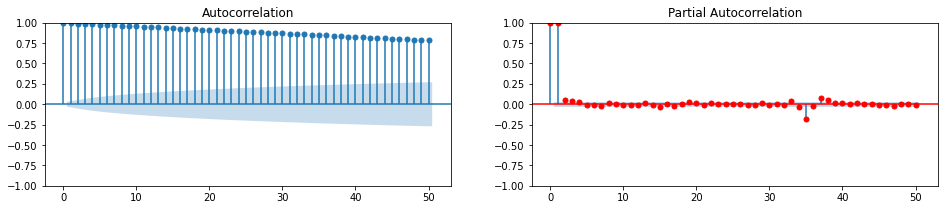

In [44]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df.Dolartoday, lags=50, ax=axes[0]);
plot_pacf(df.Dolartoday, lags=50, ax=axes[1], color='r');


    

In [47]:
important_features

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Money_Supply_M0',
 'Money_Supply_M2',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet']

In [50]:
model = ARIMA(df['Dolartoday'], exog = df['Stock_Market'], order = (50, 2, 2)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Dolartoday   No. Observations:                 4165
Model:                ARIMA(50, 2, 2)   Log Likelihood              -52140.001
Date:                Wed, 24 Nov 2021   AIC                         104388.003
Time:                        09:46:53   BIC                         104730.038
Sample:                             0   HQIC                        104509.000
                               - 4165                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Stock_Market -2.493e-07   4.81e-08     -5.180      0.000   -3.44e-07   -1.55e-07
ar.L1                -0      0.001         -0      1.000      -0.002       0.002
ar.L2                -0      0.002         -0      1.000      -0.004       0.004
ar.L3                -0      0.006         -0      1.000      -0.012       0.012
ar.L4                -0      0.009         -0      1.000      -0.017       0.017
ar.L5                -0      0.012         -0      1.000      -0.023       0.023
ar.L6                -0      0.011         -0      1.000      -0.022       0.022
ar.L7                -0      0.011         -0      1.000      -0.022       0.022
ar.L8                -0      0.013         -0      1.000      -0.025       0.025
ar.L9                -0      0.015         -0      1.000      -0.030       0.030
ar.L10               -0      0.017         -0      1.000      -0.033       0.033
ar.L11               -0      0.018         -0      1.000      -0.036       0.036
ar.L12               -0      0.019         -0      1.000      -0.038       0.038
ar.L13               -0      0.022         -0      1.000      -0.043       0.043
ar.L14               -0      0.025         -0      1.000      -0.050       0.050
ar.L15               -0      0.028         -0      1.000      -0.056       0.056
ar.L16               -0      0.028         -0      1.000      -0.056       0.056
ar.L17               -0      0.029         -0      1.000      -0.056       0.056
ar.L18               -0      0.029         -0      1.000      -0.057       0.057
ar.L19               -0      0.031         -0      1.000      -0.060       0.060
ar.L20               -0      0.031         -0      1.000      -0.060       0.060
ar.L21               -0      0.032         -0      1.000      -0.062       0.062
ar.L22               -0      0.033         -0      1.000      -0.064       0.064
ar.L23               -0      0.034         -0      1.000      -0.067       0.067
ar.L24               -0      0.035         -0      1.000      -0.068       0.068
ar.L25               -0      0.035         -0      1.000      -0.068       0.068
ar.L26               -0      0.036         -0      1.000      -0.071       0.071
ar.L27               -0      0.036         -0      1.000      -0.070       0.070
ar.L28               -0      0.036         -0      1.000      -0.071       0.071
ar.L29               -0      0.037         -0      1.000      -0.072       0.072
ar.L30               -0      0.039         -0      1.000      -0.077       0.077
ar.L31               -0      0.040         -0      1.000      -0.078       0.078
ar.L32               -0      0.039         -0      1.000      -0.077       0.077
ar.L33               -0      0.040         -0      1.000      -0.078       0.078
ar.L34               -0      0.041         -0      1.000      -0.080       0.080
ar.L35               -0      0.040         -0      1.000      -0.079       0.079
ar.L36               -0      0.040         -0      1.000      -0.078       0.078
a

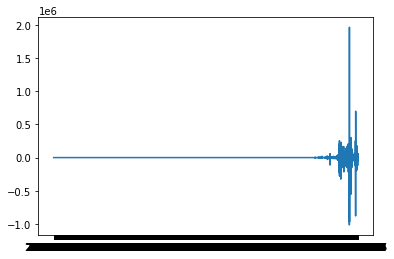

In [56]:
plt.plot(df['Dolartoday'].diff(1).diff(1))

In [81]:
np.log(df['Dolartoday']).diff().diff()

Unnamed: 0
2000-02-01         NaN
2000-03-01         NaN
2000-05-01    0.000000
2000-06-01    0.000000
2000-08-01    0.000000
                ...   
2021-11-11    0.013124
2021-11-12   -0.002195
2021-11-15    0.010905
2021-11-16    0.006299
2021-11-17    0.010137
Name: Dolartoday, Length: 4165, dtype: float64

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


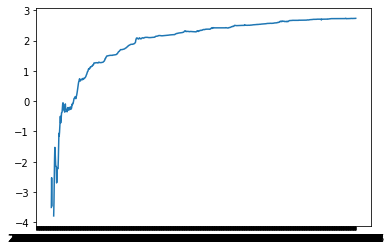

In [84]:
plt.plot(np.log((np.log(df['Dolartoday']))))

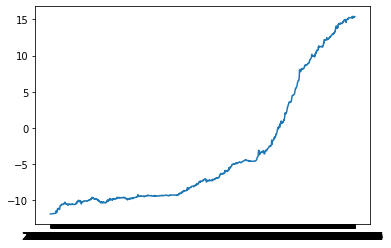

In [85]:
plt.plot((np.log(df['Dolartoday'])))

In [194]:
df.backfill(inplace=True)

In [195]:
df

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,Dolartoday_stationarity,Dolartoday_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-02-01,5.200000e-03,17.32,26.99,1.270000e-01,9.000000e-04,2985.0,56.0,0.044,15439.0,77.0,...,1.270000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.900000e-02,1.000000e-02,6.992500e-06,0.000000,-11.870672
2000-03-01,5.900000e-03,14.47,26.12,1.240000e-01,9.000000e-04,3049.0,51.0,0.043,15265.0,177.0,...,1.240000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.600000e-02,1.000000e-02,6.992500e-06,0.000000,-11.870672
2000-05-01,5.500000e-03,16.10,26.65,1.300000e-01,9.000000e-04,3103.0,52.0,0.045,16956.0,185.0,...,1.290000e-01,3.1,6.880000e+00,1.000000e-04,1.000000e-01,5.900000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
2000-06-01,6.900000e-03,19.68,22.89,1.270000e-01,9.000000e-04,3135.0,54.0,0.042,16398.0,115.0,...,1.270000e-01,3.1,7.220000e+00,1.000000e-04,1.000000e-01,5.600000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
2000-08-01,6.700000e-03,15.73,25.54,1.330000e-01,9.000000e-04,3178.0,63.0,0.045,18071.0,104.0,...,1.330000e-01,3.1,7.340000e+00,1.000000e-04,1.000000e-01,6.000000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,6.078510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06,0.002195,15.332833
2021-11-12,6.014640e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06,0.000000,15.332833
2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06,0.010905,15.343738


In [89]:
df.shape

(4165, 20)

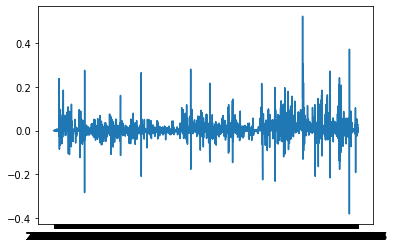

In [196]:
plt.plot(df['Dolartoday_stationarity'])

In [197]:
df['Dolartoday_stationarity'][]

Unnamed: 0
2000-03-01    0.000000
2000-05-01    0.000000
2000-06-01    0.000000
2000-08-01    0.000000
2000-09-01    0.000000
                ...   
2021-11-11    0.002195
2021-11-12    0.000000
2021-11-15    0.010905
2021-11-16    0.017205
2021-11-17    0.027341
Name: Dolartoday_stationarity, Length: 4164, dtype: float64

In [199]:
adfuller(df['Dolartoday_stationarity'])

(-10.80162146143637,
 2.010995741455404e-19,
 21,
 4143,
 {'1%': -3.431929376365231,
  '5%': -2.8622378818000214,
  '10%': -2.5671414887789292},
 -16026.540761316257)

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


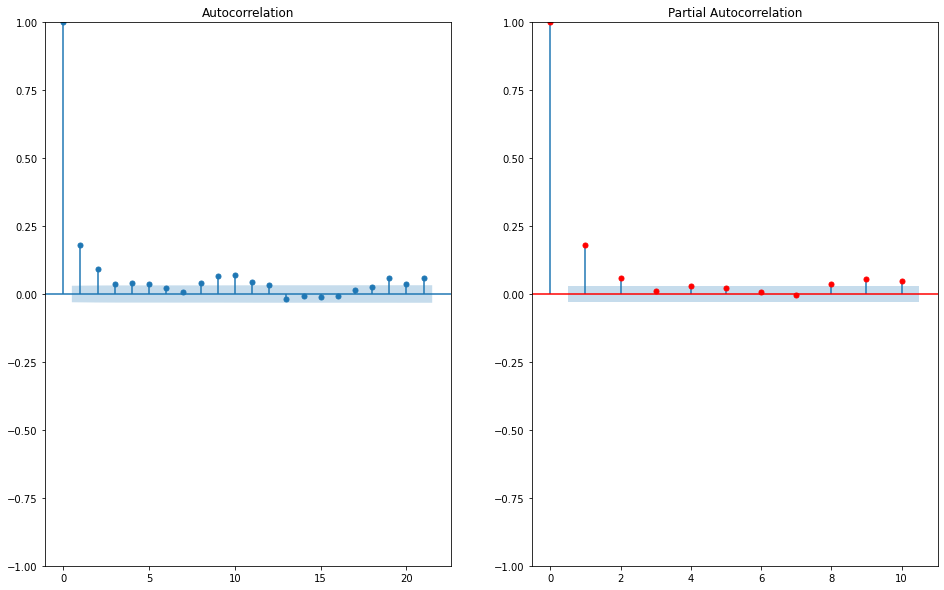

In [202]:
fig, axes = plt.subplots(1,2, figsize=(16,10))
plot_acf(df.Dolartoday_stationarity, lags=21, ax=axes[0]);
plot_pacf(df.Dolartoday_stationarity, lags=10, ax=axes[1], color='r');

In [94]:
adfuller(np.log(df['Dolartoday']).diff()[1:])[1]

2.0251322903410752e-19

In [99]:
important_features

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Money_Supply_M0',
 'Money_Supply_M2',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet']

In [100]:
model = ARIMA(df['Dolartoday_stationarity'], exog = df['Money_Supply_M0'], order = (2, 0, 2)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 4165
Model:                      ARIMA(2, 0, 2)   Log Likelihood                8077.449
Date:                     Wed, 24 Nov 2021   AIC                         -16140.899
Time:                             11:08:26   BIC                         -16096.557
Sample:                                  0   HQIC                        -16125.213
                                    - 4165                                         
Covariance Type:                       opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0065   1.27e-08   5.13e+05      0.000       0.007       0.007
Money_Supply_M0  8.877e-13   2.52e-12      0.352      0.725   -4.05e-12    5.83e-12
ar.L1               0.4443   1.37e-09   3.23e+08      0.000       0.444       0.444
ar.L2               0.0319   7.56e-10   4.22e+07      0.000       0.032       0.032
ma.L1              -0.2760   1.52e-09  -1.81e+08      0.000      -0.276      -0.276
ma.L2              -0.0227   6.87e-10  -3.31e+07      0.000      -0.023      -0.023
sigma2              0.0012   6.44e-06    188.294      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            185335.97
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+24. Standard errors may be unstable.
"""

In [103]:
feature_list.append('Dolartoday_stationarity')

In [108]:
df['Dolartoday_log'] = np.log(df['Dolartoday'])

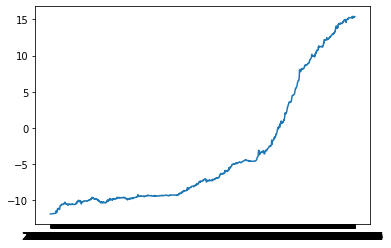

In [110]:
plt.plot(df['Dolartoday_log'])

In [111]:
feature_list.append('Dolartoday_log')

In [112]:
important_features_log = []
less_important_features_log = []
for i in feature_list[:-1]:
    if df['Dolartoday_log'].corr(df[i])>.6:
        important_features_log.append(i)
    else:
        less_important_features_log.append(i)

In [125]:
model = ARIMA(df['Dolartoday_log'], exog = df['Money_Supply_M0'], order = (50, 0, 2)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Dolartoday_log   No. Observations:                 4165
Model:                ARIMA(50, 0, 2)   Log Likelihood               -1455.148
Date:                Wed, 24 Nov 2021   AIC                           3020.296
Time:                        12:42:48   BIC                           3368.692
Sample:                             0   HQIC                          3143.540
                               - 4165                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.6753        nan        nan        nan         nan         nan
Money_Supply_M0 -1.046e-08   5.34e-11   -195.934      0.000   -1.06e-08   -1.04e-08
ar.L1               0.6258   5.74e-05   1.09e+04      0.000       0.626       0.626
ar.L2               0.2488   5.77e-05   4310.016      0.000       0.249       0.249
ar.L3               0.1226   5.78e-05   2120.225      0.000       0.122       0.123
ar.L4               0.0017    5.8e-05     29.401      0.000       0.002       0.002
ar.L5              -0.0006   5.83e-05    -10.669      0.000      -0.001      -0.001
ar.L6               0.0023   5.85e-05     39.464      0.000       0.002       0.002
ar.L7              -0.0049   5.88e-05    -84.010      0.000      -0.005      -0.005
ar.L8               0.0026   5.87e-05     43.769      0.000       0.002       0.003
ar.L9            8.109e-05    5.9e-05      1.374      0.169   -3.46e-05       0.000
ar.L10              0.0001   5.91e-05      1.958      0.050   -1.45e-07       0.000
ar.L11              0.0006   5.93e-05     10.776      0.000       0.001       0.001
ar.L12             -0.0005   5.96e-05     -8.245      0.000      -0.001      -0.000
ar.L13             -0.0013   5.99e-05    -21.126      0.000      -0.001      -0.001
ar.L14           2.784e-05      6e-05      0.464      0.643   -8.97e-05       0.000
ar.L15          -1.413e-05   6.03e-05     -0.234      0.815      -0.000       0.000
ar.L16              0.0028   5.97e-05     46.429      0.000       0.003       0.003
ar.L17             -0.0011   6.06e-05    -18.473      0.000      -0.001      -0.001
ar.L18              0.0006   6.09e-05      9.840      0.000       0.000       0.001
ar.L19             -0.0011   6.11e-05    -18.395      0.000      -0.001      -0.001
ar.L20             -0.0023   6.11e-05    -37.436      0.000      -0.002      -0.002
ar.L21              0.0272   6.23e-05    436.683      0.000       0.027       0.027
ar.L22             -0.0671   6.16e-05  -1089.256      0.000      -0.067      -0.067
ar.L23              0.0610   5.67e-05   1076.344      0.000       0.061       0.061
ar.L24             -0.0231   5.63e-05   -411.123      0.000      -0.023      -0.023
ar.L25              0.0018   5.68e-05     31.833      0.000       0.002       0.002
ar.L26              0.0040    5.7e-05     69.719      0.000       0.004       0.004
ar.L27           -8.92e-05   5.74e-05     -1.555      0.120      -0.000    2.32e-05
ar.L28             -0.0025   5.74e-05    -44.105      0.000      -0.003      -0.002
ar.L29              0.0018   5.74e-05     31.413      0.000       0.002       0.002
ar.L30              0.0005   5.76e-05      9.364      0.000       0.000       0.001
ar.L31             -0.0015   5.79e-05    -25.265      0.000      -0.002      -0.001
ar.L32              0.0002   5.79e-05      4.206      0.000       0.000       0.000
ar.L33             -0.0003   5.82e-05     -5.344      0.000      -0.000      -0.000
ar.L34              0.0023   5.83e-05     38.809 

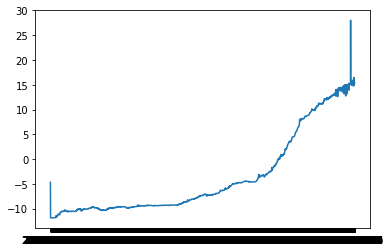

In [143]:
plt.plot(model.predict())

In [142]:
np.mean(df['Dolartoday_log'] - model.predict())

0.0074843689573914325

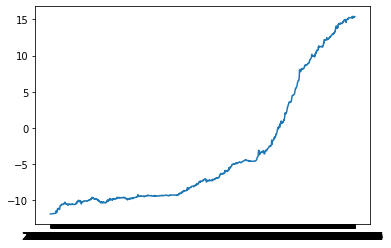

In [144]:
plt.plot(df['Dolartoday_log'])

In [145]:
model_baseline = ARIMA(df['Dolartoday_log'], order = (50, 0, 2)).fit()



/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

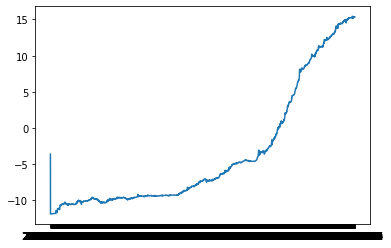

In [147]:
plt.plot(model_baseline.predict())

In [262]:
train_size = 0.9
index = round(train_size*df.shape[0])
df_train = df.iloc[:index]
df_test = df.iloc[index:]

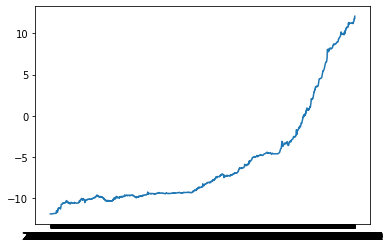

In [263]:
plt.plot(df_train['Dolartoday_log'])

In [154]:
ndiffs(df_train['Dolartoday_log'])

2

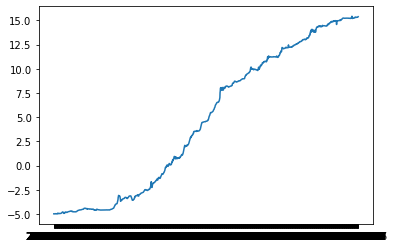

In [153]:
plt.plot(df_test['Dolartoday_log'])

In [266]:
df_train['Dolartoday_stationarity']

Unnamed: 0
2000-02-01    0.000000
2000-03-01    0.000000
2000-05-01    0.000000
2000-06-01    0.000000
2000-08-01    0.000000
                ...   
2020-04-15   -0.023814
2020-04-16   -0.036042
2020-04-17    0.000000
2020-04-20    0.163432
2020-04-21    0.136553
Name: Dolartoday_stationarity, Length: 3748, dtype: float64

In [265]:
df_test['Dolartoday_stationarity']

Unnamed: 0
2020-04-22    0.130841
2020-04-23   -0.021398
2020-04-24    0.000000
2020-04-27   -0.014301
2020-04-28   -0.042534
                ...   
2021-11-11    0.002195
2021-11-12    0.000000
2021-11-15    0.010905
2021-11-16    0.017205
2021-11-17    0.027341
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [267]:
model_baseline = ARIMA(df_train['Dolartoday_stationarity'], order = (2, 0, 2)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [268]:
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 2)   Log Likelihood                7542.965
Date:                     Thu, 25 Nov 2021   AIC                         -15073.929
Time:                             05:29:56   BIC                         -15036.555
Sample:                                  0   HQIC                        -15060.637
                                    - 3748                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.001      7.522      0.000       0.005       0.008
ar.L1         -0.1916      0.235     -0.815      0.415      -0.653       0.269
ar.L2          0.3037      0.135      2.243      0.025       0.038       0.569
ma.L1          0.4279      0.236      1.815      0.069      -0.034       0.890
ma.L2         -0.1215      0.085     -1.426      0.154      -0.289       0.046
sigma2         0.0010   6.44e-06    162.298      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            137378.23
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [269]:
df_test['Dolartoday_stationarity']

Unnamed: 0
2020-04-22    0.130841
2020-04-23   -0.021398
2020-04-24    0.000000
2020-04-27   -0.014301
2020-04-28   -0.042534
                ...   
2021-11-11    0.002195
2021-11-12    0.000000
2021-11-15    0.010905
2021-11-16    0.017205
2021-11-17    0.027341
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [270]:
y_pred = model_baseline.predict(start = len(df_train)+1 , end= len(df_train) +len(df_test) )

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [271]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

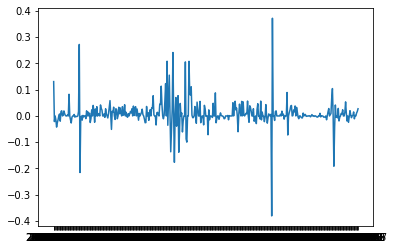

In [272]:
plt.plot(df_test['Dolartoday_stationarity'])


In [280]:
y_test = df_test['Dolartoday_stationarity'].copy()

In [284]:
y_test.reset_index(drop=True, inplace=True)

In [285]:
y_pred.reset_index(drop=True, inplace=True)

In [286]:
y_pred

0      0.026403
1      0.015586
2      0.010720
3      0.008368
4      0.007341
         ...   
412    0.006407
413    0.006407
414    0.006407
415    0.006407
416    0.006407
Name: predicted_mean, Length: 417, dtype: float64

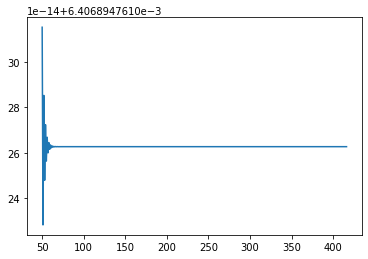

In [288]:
plt.plot(y_pred.iloc[50:])

In [289]:
y_pred.shape

(417,)

In [290]:
y_test.shape

(417,)

In [278]:
y_pred - df_test['Dolartoday_stationarity']

3749         NaN
3750         NaN
3751         NaN
3752         NaN
3753         NaN
              ..
2021-11-11   NaN
2021-11-12   NaN
2021-11-15   NaN
2021-11-16   NaN
2021-11-17   NaN
Length: 834, dtype: float64

In [261]:
df_test['Dolartoday_stationarity']

Unnamed: 0
2015-07-24    0.049734
2015-07-27   -0.001274
2015-07-28    0.000322
2015-07-29    0.000000
2015-07-30   -0.006998
                ...   
2021-11-11    0.002195
2021-11-12    0.000000
2021-11-15    0.010905
2021-11-16    0.017205
2021-11-17    0.027341
Name: Dolartoday_stationarity, Length: 1666, dtype: float64

In [287]:
rmse(y_pred, y_test)

0.04899613195572951

In [481]:
model_baseline_pred = model_baseline.predict(len(df), len(df)+30)

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [484]:
model_baseline_pred.iloc[-1]

0.006406894761262737

In [293]:
y_train = df_train['Dolartoday_stationarity']

In [307]:
money_supply_train = df_train['Money_Supply_M1'].copy()

In [312]:
money_supply_train = np.expand_dims(money_supply_train, axis=1)

In [317]:
money_supply_train.shape

(3748, 1)

In [316]:
df_train.Money_Supply_M1.shape

(3748,)

In [325]:
y_train.shape

(3748,)

In [318]:
arima_params = pm.auto_arima(y_train, X=money_supply_train, start_p=1, start_q=1, d = 0, max_d=2, max_p=10, max_q=3, )

In [319]:
arima_params

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [299]:
y_test

0      0.130841
1     -0.021398
2      0.000000
3     -0.014301
4     -0.042534
         ...   
412    0.002195
413    0.000000
414    0.010905
415    0.017205
416    0.027341
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [473]:
y_pred2 = arima_params.predict(len(y_test))

ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.

In [477]:
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 2)   Log Likelihood                7542.965
Date:                     Mon, 29 Nov 2021   AIC                         -15073.929
Time:                             13:45:52   BIC                         -15036.555
Sample:                                  0   HQIC                        -15060.637
                                    - 3748                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.001      7.522      0.000       0.005       0.008
ar.L1         -0.1916      0.235     -0.815      0.415      -0.653       0.269
ar.L2          0.3037      0.135      2.243      0.025       0.038       0.569
ma.L1          0.4279      0.236      1.815      0.069      -0.034       0.890
ma.L2         -0.1215      0.085     -1.426      0.154      -0.289       0.046
sigma2         0.0010   6.44e-06    162.298      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            137378.23
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [476]:
model_baseline.predict()

Unnamed: 0
2000-02-01    0.006407
2000-03-01    0.004762
2000-05-01    0.004375
2000-06-01    0.004392
2000-08-01    0.004341
                ...   
2020-04-15    0.019922
2020-04-16   -0.001005
2020-04-17   -0.004316
2020-04-20    0.000848
2020-04-21    0.043424
Name: predicted_mean, Length: 3748, dtype: float64

In [301]:
rmse(y_pred1, y_test)

0.04892004370526188

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


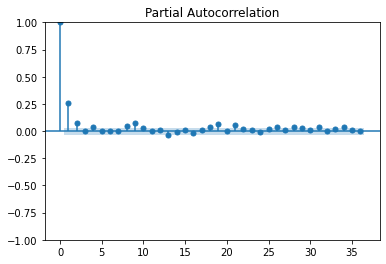

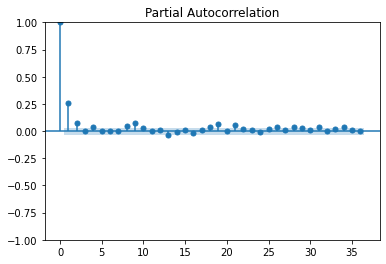

In [322]:
plot_pacf(y_train)

## Trying out ARIMAX model with Money_Supply_M0

In [329]:
arimax_money_m0 = ARIMA(y_train, df_train['Money_Supply_M0'], order=(2,0,0)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [330]:
arimax_money_m0.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 0)   Log Likelihood                7545.039
Date:                     Thu, 25 Nov 2021   AIC                         -15080.079
Time:                             06:19:10   BIC                         -15048.934
Sample:                                  0   HQIC                        -15069.002
                                    - 3748                                         
Covariance Type:                       opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0060      0.001      7.084      0.000       0.004       0.008
Money_Supply_M0  2.851e-10    7.3e-11      3.907      0.000    1.42e-10    4.28e-10
ar.L1               0.2361   1.41e-05   1.68e+04      0.000       0.236       0.236
ar.L2               0.0741   2.59e-05   2862.221      0.000       0.074       0.074
sigma2              0.0010   6.38e-06    163.711      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            137827.63
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.39e+19. Standard errors may be unstable.
"""

In [333]:
y_pred_arimax_m0 = arimax_money_m0.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test['Money_Supply_M0'])

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [339]:
rmse_arimax_m0 = rmse(y_pred_arimax_m0, y_test)

In [338]:
y_pred_arimax_m0.reset_index(drop=True, inplace=True)

In [340]:
rmse_arimax_m0

0.16364841458670565

## Trying out ARIMAX Model with M1

In [341]:
arimax_money_m1 = ARIMA(y_train, df_train['Money_Supply_M1'], order=(2,0,0)).fit()

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [342]:
arimax_money_m1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 0)   Log Likelihood                7545.217
Date:                     Thu, 25 Nov 2021   AIC                         -15080.433
Time:                             07:12:00   BIC                         -15049.288
Sample:                                  0   HQIC                        -15069.357
                                    - 3748                                         
Covariance Type:                       opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0060      0.001      7.087      0.000       0.004       0.008
Money_Supply_M1  2.244e-10   5.54e-11      4.051      0.000    1.16e-10    3.33e-10
ar.L1               0.2360   1.39e-05    1.7e+04      0.000       0.236       0.236
ar.L2               0.0740   2.57e-05   2876.214      0.000       0.074       0.074
sigma2              0.0010   6.38e-06    163.708      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            137794.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+19. Standard errors may be unstable.
"""

In [343]:
y_pred_arimax_m1 = arimax_money_m1.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test['Money_Supply_M1'])

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [344]:
y_pred_arimax_m1.reset_index(drop=True, inplace=True)

In [345]:
rmse_arimax_m1 = rmse(y_pred_arimax_m1, y_test)

In [346]:
rmse_arimax_m1

0.3054582343039394

In [351]:
feature_list

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Money_Supply_M0',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Money_Supply_M2',
 'Inflation_Rate_Mom',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet']

In [359]:
rmse_low = 0
mae_low = 0
rmse_low_feature=""
mae_low_feature = ""
for i in feature_list:
    model = ARIMA(y_train, df_train[i], order=(2,0,0)).fit()
    y_pred = model.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test[i])
    y_pred.reset_index(drop=True, inplace=True)
    rmse_value = rmse(y_pred, y_test)
 #   mae_value = mean_absolute_error(y_pred, y_test)
    if rmse_low == 0:
        rmse_low = rmse_value
    if rmse_value < rmse_low:
        rmse_low = rmse_value
        rmse_low_feature = i
#     if mae_low == 0:
#         mae_low = mae_value
#     if mae_value < mae_low:
#         mae_low = mae_value
#         mae_low_feature = i

print(f"The lowest rmse of {rmse_low} came from using {rmse_low_feature}")

#print(f"The lowest mae came from using {mae_low_feature}")
    

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

The lowest rmse of 0.049008147885682106 came from using Inflation_Rate_Mom


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


## ARIMAX model using inflation rate mom

In [360]:
model = ARIMA(y_train, df_train['Inflation_Rate_Mom',""], order=(2,0,0)).fit()


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [361]:
y_pred = model.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test['Inflation_Rate_Mom'])


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [362]:
y_pred.reset_index(drop=True, inplace=True)


In [363]:
rmse_value = rmse(y_pred, y_test)
rmse_value

0.049008147885682106

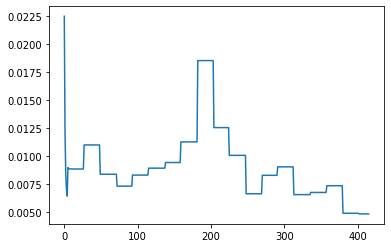

In [366]:
plt.plot(y_pred)

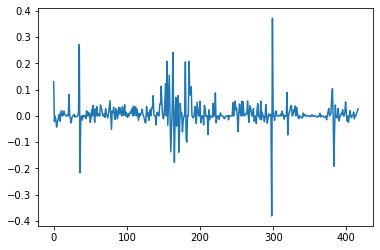

In [365]:
plt.plot(y_test)

In [370]:
df_train[['Inflation_Rate','Inflation_Rate_Mom']]

,Inflation_Rate,Inflation_Rate_Mom
Unnamed: 0,,
2000-02-01,19.40,3.1
2000-03-01,17.92,3.1
2000-05-01,18.00,3.1
2000-06-01,16.85,3.1
2000-08-01,15.74,3.1
...,...,...
2020-04-15,2430.60,13.3
2020-04-16,2430.60,13.3
2020-04-17,2430.60,13.3


In [374]:
model = ARIMA(y_train, df_train[['Inflation_Rate_Mom',"Inflation_Rate"]], order=(2,0,0)).fit()
y_pred = model.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test[['Inflation_Rate_Mom','Inflation_Rate']])
y_pred.reset_index(drop=True, inplace=True)
rmse_value = rmse(y_pred, y_test)
rmse_value


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

0.04902766202587616

In [377]:
feature_list.remove('Inflation_Rate_Mom')

In [384]:
feature_list.append('Inflation_Rate_Mom')

In [385]:
feature_list

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Money_Supply_M0',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Money_Supply_M2',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet',
 'Inflation_Rate_Mom']

In [386]:
rmse_low = 0
rmse_low_feature=""
for i in feature_list:
    for j in feature_list:
        if j != i:
            model = ARIMA(y_train, df_train[[i,j]], order=(2,0,0)).fit()
            y_pred = model.predict(start = len(df_train)+1, end= len(df_train) +len(df_test) -1, exog= df_test[[i,j]])
            y_pred.reset_index(drop=True, inplace=True)
            rmse_value = rmse(y_pred, y_test)
            if rmse_low == 0:
                rmse_low = rmse_value
            if rmse_value < rmse_low:
                rmse_low = rmse_value
                rmse_low_feature1 = i
                rmse_low_feature2 = j
        
        
print(f"The lowest rmse of {rmse_low} came from using {rmse_low_feature1} and {rmse_low_feature2}")


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsm

The lowest rmse of 0.04900225634813032 came from using Inflation_Rate_Mom and External_Debt and Inflation_Rate_Mom


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


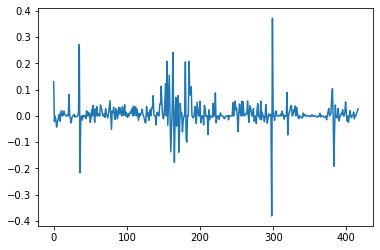

In [388]:
plt.plot(y_test)




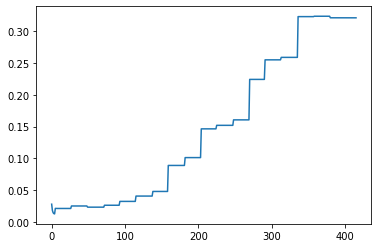

In [387]:
plt.plot(y_pred)



In [456]:
y_train

Unnamed: 0
2000-02-01    0.000000
2000-03-01    0.000000
2000-05-01    0.000000
2000-06-01    0.000000
2000-08-01    0.000000
                ...   
2020-04-15   -0.023814
2020-04-16   -0.036042
2020-04-17    0.000000
2020-04-20    0.163432
2020-04-21    0.136553
Name: Dolartoday_stationarity, Length: 3748, dtype: float64

In [411]:
model = ARIMA(y_train, df_train[['External_Debt','Inflation_Rate_Mom']], order=(30,0,0)).fit()
model1 = ARIMA(y_train, df_train['Inflation_Rate_Mom'], order=(30,0,0)).fit()





/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/

In [412]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                     ARIMA(30, 0, 0)   Log Likelihood                7598.871
Date:                     Thu, 25 Nov 2021   AIC                         -15131.742
Time:                             09:45:12   BIC                         -14926.186
Sample:                                  0   HQIC                        -15058.637
                                    - 3748                                         
Covariance Type:                       opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0037      0.001      3.572      0.000       0.002       0.006
Inflation_Rate_Mom     0.0002   2.64e-05      6.899      0.000       0.000       0.000
ar.L1                  0.2208      0.007     32.166      0.000       0.207       0.234
ar.L2                  0.0618      0.007      8.442      0.000       0.047       0.076
ar.L3                 -0.0175      0.011     -1.556      0.120      -0.040       0.005
ar.L4                  0.0298      0.013      2.367      0.018       0.005       0.054
ar.L5                 -0.0067      0.012     -0.560      0.576      -0.030       0.017
ar.L6                 -0.0077      0.014     -0.529      0.597      -0.036       0.021
ar.L7                 -0.0243      0.013     -1.906      0.057      -0.049       0.001
ar.L8                  0.0243      0.016      1.510      0.131      -0.007       0.056
ar.L9                  0.0523      0.017      3.020      0.003       0.018       0.086
ar.L10                 0.0200      0.016      1.262      0.207      -0.011       0.051
ar.L11                -0.0138      0.015     -0.909      0.364      -0.044       0.016
ar.L12                 0.0148      0.013      1.148      0.251      -0.010       0.040
ar.L13                -0.0427      0.018     -2.428      0.015      -0.077      -0.008
ar.L14                -0.0170      0.015     -1.116      0.264      -0.047       0.013
ar.L15                 0.0039      0.017      0.227      0.820      -0.030       0.038
ar.L16                -0.0280      0.017     -1.614      0.106      -0.062       0.006
ar.L17                -0.0206      0.015     -1.353      0.176      -0.050       0.009
ar.L18                 0.0073      0.017      0.428      0.669      -0.026       0.041
ar.L19                 0.0517      0.018      2.937      0.003       0.017       0.086
ar.L20                -0.0284      0.019     -1.530      0.126      -0.065       0.008
ar.L21                 0.0407      0.020      2.036      0.042       0.002       0.080
ar.L22                 0.0084      0.018      0.471      0.638      -0.027       0.044
ar.L23                 0.0005      0.017      0.027      0.978      -0.033       0.034
ar.L24                -0.0254      0.020     -1.281      0.200      -0.064       0.013
ar.L25                -0.0051      0.021     -0.241      0.810      -0.047       0.036
ar.L26                 0.0194      0.019      1.043      0.297      -0.017       0.056
ar.L27                -0.0078      0.019     -0.411      0.681      -0.045       0.029
ar.L28                 0.0192      0.021      0.900      0.368      -0.023       0.061
ar.L29                 0.0092      0.019      0.479      0.632      -0.028       0.047
ar.L30                -0.0042      0.016     -0.253      0.800      -0.036       0.028
sigma2                 0.0010   7.61e-06    133.214      0.000       0.001       0.001
================================================================

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


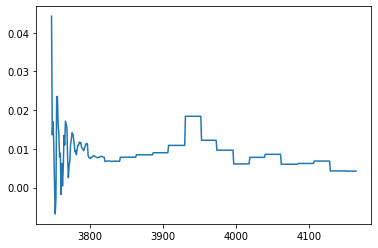

In [438]:
y_pred = model.predict(start = len(df_train), end= len(df_train) +len(df_test)-1, exog= df_test[['External_Debt','Inflation_Rate_Mom']])

plt.plot(y_pred)


In [439]:
len(y_pred)

417

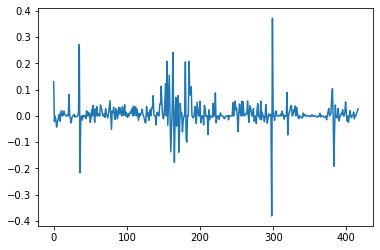

In [440]:
plt.plot(y_test)

In [443]:
rmse(y_pred, y_test)

nan

In [397]:
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 2)   Log Likelihood                7542.965
Date:                     Thu, 25 Nov 2021   AIC                         -15073.929
Time:                             08:39:32   BIC                         -15036.555
Sample:                                  0   HQIC                        -15060.637
                                    - 3748                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.001      7.522      0.000       0.005       0.008
ar.L1         -0.1916      0.235     -0.815      0.415      -0.653       0.269
ar.L2          0.3037      0.135      2.243      0.025       0.038       0.569
ma.L1          0.4279      0.236      1.815      0.069      -0.034       0.890
ma.L2         -0.1215      0.085     -1.426      0.154      -0.289       0.046
sigma2         0.0010   6.44e-06    162.298      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            137378.23
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [402]:
df_train['External_Debt'].dtypes

dtype('float64')

In [418]:
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                      ARIMA(2, 0, 2)   Log Likelihood                7542.965
Date:                     Thu, 25 Nov 2021   AIC                         -15073.929
Time:                             11:21:29   BIC                         -15036.555
Sample:                                  0   HQIC                        -15060.637
                                    - 3748                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.001      7.522      0.000       0.005       0.008
ar.L1         -0.1916      0.235     -0.815      0.415      -0.653       0.269
ar.L2          0.3037      0.135      2.243      0.025       0.038       0.569
ma.L1          0.4279      0.236      1.815      0.069      -0.034       0.890
ma.L2         -0.1215      0.085     -1.426      0.154      -0.289       0.046
sigma2         0.0010   6.44e-06    162.298      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            137378.23
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [441]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                     ARIMA(30, 0, 0)   Log Likelihood                7599.426
Date:                     Fri, 26 Nov 2021   AIC                         -15130.852
Time:                             05:16:06   BIC                         -14919.067
Sample:                                  0   HQIC                        -15055.531
                                    - 3748                                         
Covariance Type:                       opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0029      0.001      2.352      0.019       0.000       0.005
External_Debt        2.42e-06   2.61e-06      0.927      0.354    -2.7e-06    7.54e-06
Inflation_Rate_Mom     0.0002   2.65e-05      7.562      0.000       0.000       0.000
ar.L1                  0.2205      0.007     31.770      0.000       0.207       0.234
ar.L2                  0.0615      0.007      8.312      0.000       0.047       0.076
ar.L3                 -0.0178      0.011     -1.569      0.117      -0.040       0.004
ar.L4                  0.0294      0.013      2.312      0.021       0.004       0.054
ar.L5                 -0.0071      0.012     -0.585      0.559      -0.031       0.017
ar.L6                 -0.0079      0.015     -0.540      0.590      -0.037       0.021
ar.L7                 -0.0246      0.013     -1.911      0.056      -0.050       0.001
ar.L8                  0.0242      0.016      1.487      0.137      -0.008       0.056
ar.L9                  0.0521      0.017      2.989      0.003       0.018       0.086
ar.L10                 0.0195      0.016      1.224      0.221      -0.012       0.051
ar.L11                -0.0143      0.015     -0.930      0.352      -0.044       0.016
ar.L12                 0.0144      0.013      1.108      0.268      -0.011       0.040
ar.L13                -0.0431      0.018     -2.434      0.015      -0.078      -0.008
ar.L14                -0.0173      0.015     -1.130      0.258      -0.047       0.013
ar.L15                 0.0034      0.017      0.198      0.843      -0.030       0.037
ar.L16                -0.0287      0.017     -1.639      0.101      -0.063       0.006
ar.L17                -0.0212      0.015     -1.388      0.165      -0.051       0.009
ar.L18                 0.0068      0.017      0.396      0.692      -0.027       0.040
ar.L19                 0.0515      0.018      2.894      0.004       0.017       0.086
ar.L20                -0.0290      0.019     -1.549      0.121      -0.066       0.008
ar.L21                 0.0401      0.020      1.987      0.047       0.001       0.080
ar.L22                 0.0081      0.018      0.447      0.655      -0.027       0.043
ar.L23             -1.528e-05      0.017     -0.001      0.999      -0.034       0.034
ar.L24                -0.0260      0.020     -1.302      0.193      -0.065       0.013
ar.L25                -0.0055      0.021     -0.259      0.796      -0.047       0.036
ar.L26                 0.0187      0.019      1.001      0.317      -0.018       0.055
ar.L27                -0.0084      0.019     -0.440      0.660      -0.046       0.029
ar.L28                 0.0185      0.021      0.860      0.390      -0.024       0.061
ar.L29                 0.0086      0.019      0.446      0.655      -0.029       0.046
ar.L30                -0.0052      0.017     -0.314      0.754      -0.038       0.027
sigma2                 0.0010   7.74e-06    132.066      0.000  

In [420]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                     ARIMA(30, 0, 0)   Log Likelihood                7598.871
Date:                     Thu, 25 Nov 2021   AIC                         -15131.742
Time:                             11:22:11   BIC                         -14926.186
Sample:                                  0   HQIC                        -15058.637
                                    - 3748                                         
Covariance Type:                       opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0037      0.001      3.572      0.000       0.002       0.006
Inflation_Rate_Mom     0.0002   2.64e-05      6.899      0.000       0.000       0.000
ar.L1                  0.2208      0.007     32.166      0.000       0.207       0.234
ar.L2                  0.0618      0.007      8.442      0.000       0.047       0.076
ar.L3                 -0.0175      0.011     -1.556      0.120      -0.040       0.005
ar.L4                  0.0298      0.013      2.367      0.018       0.005       0.054
ar.L5                 -0.0067      0.012     -0.560      0.576      -0.030       0.017
ar.L6                 -0.0077      0.014     -0.529      0.597      -0.036       0.021
ar.L7                 -0.0243      0.013     -1.906      0.057      -0.049       0.001
ar.L8                  0.0243      0.016      1.510      0.131      -0.007       0.056
ar.L9                  0.0523      0.017      3.020      0.003       0.018       0.086
ar.L10                 0.0200      0.016      1.262      0.207      -0.011       0.051
ar.L11                -0.0138      0.015     -0.909      0.364      -0.044       0.016
ar.L12                 0.0148      0.013      1.148      0.251      -0.010       0.040
ar.L13                -0.0427      0.018     -2.428      0.015      -0.077      -0.008
ar.L14                -0.0170      0.015     -1.116      0.264      -0.047       0.013
ar.L15                 0.0039      0.017      0.227      0.820      -0.030       0.038
ar.L16                -0.0280      0.017     -1.614      0.106      -0.062       0.006
ar.L17                -0.0206      0.015     -1.353      0.176      -0.050       0.009
ar.L18                 0.0073      0.017      0.428      0.669      -0.026       0.041
ar.L19                 0.0517      0.018      2.937      0.003       0.017       0.086
ar.L20                -0.0284      0.019     -1.530      0.126      -0.065       0.008
ar.L21                 0.0407      0.020      2.036      0.042       0.002       0.080
ar.L22                 0.0084      0.018      0.471      0.638      -0.027       0.044
ar.L23                 0.0005      0.017      0.027      0.978      -0.033       0.034
ar.L24                -0.0254      0.020     -1.281      0.200      -0.064       0.013
ar.L25                -0.0051      0.021     -0.241      0.810      -0.047       0.036
ar.L26                 0.0194      0.019      1.043      0.297      -0.017       0.056
ar.L27                -0.0078      0.019     -0.411      0.681      -0.045       0.029
ar.L28                 0.0192      0.021      0.900      0.368      -0.023       0.061
ar.L29                 0.0092      0.019      0.479      0.632      -0.028       0.047
ar.L30                -0.0042      0.016     -0.253      0.800      -0.036       0.028
sigma2                 0.0010   7.61e-06    133.214      0.000       0.001       0.001
================================================================

In [442]:
mean_absolute_error(y_pred, y_test)

0.02474229650490868

In [457]:
y_test

0      0.130841
1     -0.021398
2      0.000000
3     -0.014301
4     -0.042534
         ...   
412    0.002195
413    0.000000
414    0.010905
415    0.017205
416    0.027341
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [458]:
y_pred

3748    0.044272
3749    0.013669
3750    0.017018
3751    0.011880
3752    0.001588
          ...   
4160    0.004262
4161    0.004262
4162    0.004262
4163    0.004262
4164    0.004262
Name: predicted_mean, Length: 417, dtype: float64

In [454]:
mean_absolute_percentage_error(y_pred, y_test)

3.0227349122688394

In [424]:
y_test.shape

(417,)

In [432]:
y_pred

3749    0.013669
3750    0.017018
3751    0.011880
3752    0.001588
3753   -0.006784
          ...   
4160    0.004262
4161    0.004262
4162    0.004262
4163    0.004262
4164    0.004262
Name: predicted_mean, Length: 416, dtype: float64

In [433]:
y_test


0      0.130841
1     -0.021398
2      0.000000
3     -0.014301
4     -0.042534
         ...   
412    0.002195
413    0.000000
414    0.010905
415    0.017205
416    0.027341
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [471]:
model.predict(len(df), exog= df[['External_Debt','Inflation_Rate_Mom']])

/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Provided exogenous values are not of the appropriate shape. Required (418, 2), got (4165, 2).

In [472]:
df


,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,Dolartoday_stationarity,Dolartoday_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-02-01,5.200000e-03,17.32,26.99,1.270000e-01,9.000000e-04,2985.0,56.0,0.044,15439.0,77.0,...,1.270000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.900000e-02,1.000000e-02,6.992500e-06,0.000000,-11.870672
2000-03-01,5.900000e-03,14.47,26.12,1.240000e-01,9.000000e-04,3049.0,51.0,0.043,15265.0,177.0,...,1.240000e-01,3.1,6.540000e+00,1.000000e-04,1.000000e-01,5.600000e-02,1.000000e-02,6.992500e-06,0.000000,-11.870672
2000-05-01,5.500000e-03,16.10,26.65,1.300000e-01,9.000000e-04,3103.0,52.0,0.045,16956.0,185.0,...,1.290000e-01,3.1,6.880000e+00,1.000000e-04,1.000000e-01,5.900000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
2000-06-01,6.900000e-03,19.68,22.89,1.270000e-01,9.000000e-04,3135.0,54.0,0.042,16398.0,115.0,...,1.270000e-01,3.1,7.220000e+00,1.000000e-04,1.000000e-01,5.600000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
2000-08-01,6.700000e-03,15.73,25.54,1.330000e-01,9.000000e-04,3178.0,63.0,0.045,18071.0,104.0,...,1.330000e-01,3.1,7.340000e+00,1.000000e-04,1.000000e-01,6.000000e-02,2.000000e-02,6.992500e-06,0.000000,-11.870672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,6.078510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06,0.002195,15.332833
2021-11-12,6.014640e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.560000e+06,0.000000,15.332833
2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1325000.000,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06,0.010905,15.343738


In [461]:
model_prediction = model.predict(start = len(df_train), end= len(df_train) +len(df_test)-1, exog= df_test[['External_Debt','Inflation_Rate_Mom']])


/Users/daraalizadeh/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [462]:
np.exp(model_prediction.cumsum())

3748     1.045266
3749     1.059652
3750     1.077839
3751     1.090720
3752     1.092454
          ...    
4160    37.221165
4161    37.380145
4162    37.539803
4163    37.700143
4164    37.861168
Name: predicted_mean, Length: 417, dtype: float64

In [463]:
np.exp(y_test.cumsum())

0       1.139786
1       1.115656
2       1.115656
3       1.099814
4       1.054016
         ...    
412    25.979484
413    25.979484
414    26.264346
415    26.720127
416    27.460770
Name: Dolartoday_stationarity, Length: 417, dtype: float64

In [459]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Dolartoday_stationarity   No. Observations:                 3748
Model:                     ARIMA(30, 0, 0)   Log Likelihood                7599.426
Date:                     Mon, 29 Nov 2021   AIC                         -15130.852
Time:                             12:52:53   BIC                         -14919.067
Sample:                                  0   HQIC                        -15055.531
                                    - 3748                                         
Covariance Type:                       opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0029      0.001      2.352      0.019       0.000       0.005
External_Debt        2.42e-06   2.61e-06      0.927      0.354    -2.7e-06    7.54e-06
Inflation_Rate_Mom     0.0002   2.65e-05      7.562      0.000       0.000       0.000
ar.L1                  0.2205      0.007     31.770      0.000       0.207       0.234
ar.L2                  0.0615      0.007      8.312      0.000       0.047       0.076
ar.L3                 -0.0178      0.011     -1.569      0.117      -0.040       0.004
ar.L4                  0.0294      0.013      2.312      0.021       0.004       0.054
ar.L5                 -0.0071      0.012     -0.585      0.559      -0.031       0.017
ar.L6                 -0.0079      0.015     -0.540      0.590      -0.037       0.021
ar.L7                 -0.0246      0.013     -1.911      0.056      -0.050       0.001
ar.L8                  0.0242      0.016      1.487      0.137      -0.008       0.056
ar.L9                  0.0521      0.017      2.989      0.003       0.018       0.086
ar.L10                 0.0195      0.016      1.224      0.221      -0.012       0.051
ar.L11                -0.0143      0.015     -0.930      0.352      -0.044       0.016
ar.L12                 0.0144      0.013      1.108      0.268      -0.011       0.040
ar.L13                -0.0431      0.018     -2.434      0.015      -0.078      -0.008
ar.L14                -0.0173      0.015     -1.130      0.258      -0.047       0.013
ar.L15                 0.0034      0.017      0.198      0.843      -0.030       0.037
ar.L16                -0.0287      0.017     -1.639      0.101      -0.063       0.006
ar.L17                -0.0212      0.015     -1.388      0.165      -0.051       0.009
ar.L18                 0.0068      0.017      0.396      0.692      -0.027       0.040
ar.L19                 0.0515      0.018      2.894      0.004       0.017       0.086
ar.L20                -0.0290      0.019     -1.549      0.121      -0.066       0.008
ar.L21                 0.0401      0.020      1.987      0.047       0.001       0.080
ar.L22                 0.0081      0.018      0.447      0.655      -0.027       0.043
ar.L23             -1.528e-05      0.017     -0.001      0.999      -0.034       0.034
ar.L24                -0.0260      0.020     -1.302      0.193      -0.065       0.013
ar.L25                -0.0055      0.021     -0.259      0.796      -0.047       0.036
ar.L26                 0.0187      0.019      1.001      0.317      -0.018       0.055
ar.L27                -0.0084      0.019     -0.440      0.660      -0.046       0.029
ar.L28                 0.0185      0.021      0.860      0.390      -0.024       0.061
ar.L29                 0.0086      0.019      0.446      0.655      -0.029       0.046
ar.L30                -0.0052      0.017     -0.314      0.754      -0.038       0.027
sigma2                 0.0010   7.74e-06    132.066      0.000  

In [444]:
df_train

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,Dolartoday_stationarity,Dolartoday_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-02-01,5.200000e-03,17.32,26.99,1.270000e-01,9.000000e-04,2985.0,56.0,4.400000e-02,15439.0,77.0,...,1.270000e-01,3.1,6.540000e+00,0.0001,1.000000e-01,5.900000e-02,1.000000e-02,0.000007,0.000000,-11.870672
2000-03-01,5.900000e-03,14.47,26.12,1.240000e-01,9.000000e-04,3049.0,51.0,4.300000e-02,15265.0,177.0,...,1.240000e-01,3.1,6.540000e+00,0.0001,1.000000e-01,5.600000e-02,1.000000e-02,0.000007,0.000000,-11.870672
2000-05-01,5.500000e-03,16.10,26.65,1.300000e-01,9.000000e-04,3103.0,52.0,4.500000e-02,16956.0,185.0,...,1.290000e-01,3.1,6.880000e+00,0.0001,1.000000e-01,5.900000e-02,2.000000e-02,0.000007,0.000000,-11.870672
2000-06-01,6.900000e-03,19.68,22.89,1.270000e-01,9.000000e-04,3135.0,54.0,4.200000e-02,16398.0,115.0,...,1.270000e-01,3.1,7.220000e+00,0.0001,1.000000e-01,5.600000e-02,2.000000e-02,0.000007,0.000000,-11.870672
2000-08-01,6.700000e-03,15.73,25.54,1.330000e-01,9.000000e-04,3178.0,63.0,4.500000e-02,18071.0,104.0,...,1.330000e-01,3.1,7.340000e+00,0.0001,1.000000e-01,6.000000e-02,2.000000e-02,0.000007,0.000000,-11.870672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,2.485099e+10,24.00,33.18,7.411902e+07,3.646979e+06,718.0,23.0,5.439892e+07,6552.0,0.0,...,7.411902e+07,13.3,1.470344e+09,23995.1127,1.991854e+07,7.396514e+07,4.817334e+11,134804.720000,-0.023814,11.811582
2020-04-16,2.418942e+10,24.00,33.18,7.411902e+07,3.646979e+06,718.0,23.0,5.439892e+07,6552.0,0.0,...,7.411902e+07,13.3,1.470344e+09,23995.1127,1.991854e+07,7.396514e+07,4.817334e+11,130032.620000,-0.036042,11.775541
2020-04-17,2.307429e+10,24.00,33.18,7.411902e+07,3.646979e+06,718.0,23.0,5.439892e+07,6552.0,0.0,...,7.411902e+07,13.3,1.470344e+09,23995.1127,1.991854e+07,7.396514e+07,4.817334e+11,130032.620000,0.000000,11.775541


In [ ]:
money_supply_train = df_train['Money_Supply_M1'].copy()
money_supply_train = np.expand_dims(money_supply_train, axis=1)


In [446]:
money_supply_train

array([[5.9000000e-02],
       [5.6000000e-02],
       [5.9000000e-02],
       ...,
       [7.3965139e+07],
       [7.3965139e+07],
       [7.3965139e+07]])

In [449]:
model_auto_arima = pm.auto_arima(y_train, X=df_train[['External_Debt', 'Inflation_Rate_Mom']], start_p=1, start_q=1, d = 0, max_d=2, max_p=50, max_q=3, )

In [450]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3748
Model:               SARIMAX(2, 0, 0)   Log Likelihood                7566.954
Date:                Fri, 26 Nov 2021   AIC                         -15121.907
Time:                        05:36:35   BIC                         -15084.533
Sample:                             0   HQIC                        -15108.615
                               - 3748                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0012      0.001      1.486      0.137      -0.000       0.003
External_Debt       3.228e-06   2.53e-06      1.276      0.202   -1.73e-06    8.19e-06
Inflation_Rate_Mom     0.0002   2.11e-05     11.271      0.000       0.000       0.000
ar.L1                  0.2236      0.006     36.572      0.000       0.212       0.236
ar.L2                  0.0603      0.006      9.543      0.000       0.048       0.073
sigma2                 0.0010   6.57e-06    157.263      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            132196.10
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [451]:
auto_arima_predict = model_auto_arima.predict(start = len(df_train), end= len(df_train) +len(df_test)-1, exog= df_test[['External_Debt','Inflation_Rate_Mom']])


ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.